#### Molecules and descriptors
More information can be here:
http://www.rdkit.org/docs/index.html and http://www.rdkit.org/docs/api/index.html

In [1]:
!pip install rdkit
# The majority of the basic molecular functionality is found in module rdkit.Chem
from rdkit import Chem
# drawing
from rdkit.Chem import Draw
# fingerprints
from rdkit.Chem import MACCSkeys
import numpy as np

In [2]:
# Individual molecules can be constructed using a variety of approaches, e.g. SMILES
# FDA approved EGFR inhibitors: Gefitinib, Erlotinib
gefitinib = Chem.MolFromSmiles("COc1cc2c(cc1OCCCN3CCOCC3)c(ncn2)Nc4ccc(c(c4)Cl)F")

#### Drawing molecules

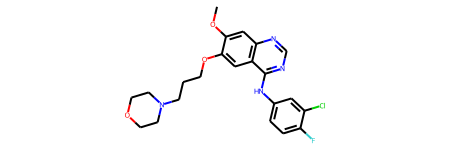

In [3]:
gefitinib

In [4]:
erlotinib = Chem.MolFromSmiles("COCCOc1cc2c(cc1OCCOC)ncnc2Nc3cccc(c3)C#C")

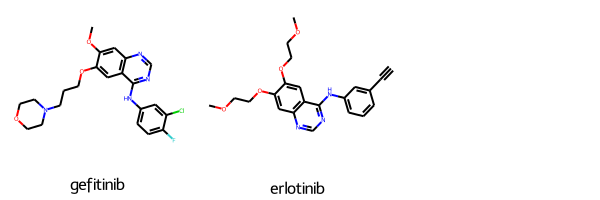

In [5]:
Draw.MolsToGridImage([gefitinib, erlotinib], legends=["gefitinib", "erlotinib"])

## Fingerprinting and Molecular Similarity
### Molecular descriptors: Physchem properties

In [6]:
from rdkit.Chem import Descriptors

In [7]:
# hit Tab behind Descriptors. to see which descriptors are available in the library
print("Heavy atoms:", Descriptors.HeavyAtomCount(gefitinib))
print("Hydrogen bond donors:", Descriptors.NumHDonors(gefitinib))
print("logP:", Descriptors.MolLogP(gefitinib))

Heavy atoms: 31
Hydrogen bond donors: 1
logP: 4.275600000000003


In [8]:
print("Heavy atoms:", Descriptors.HeavyAtomCount(erlotinib))
print("Hydrogen bond donors:", Descriptors.NumHDonors(erlotinib))
print("logP:", Descriptors.MolLogP(erlotinib))

Heavy atoms: 29
Hydrogen bond donors: 1
logP: 3.405100000000002


### Better for similarity search: Molecular fingerprints
#### MACCS keys
* There is a SMARTS-based implementation of the 166 public MACCS keys (certain substructure/SMARTS keys which are expected to be found)
* The MACCS keys are a set of questions about a chemical structure
* Based on counting substructural features

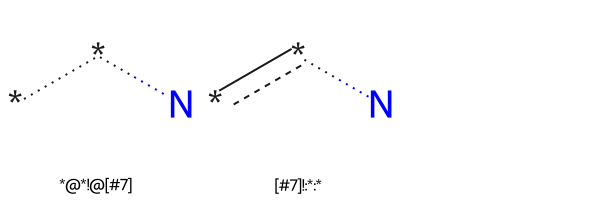

In [9]:
#example MACCS keys
smarts = ["*@*!@[#7]", "[#7]!:*:*"]
smarts_as_molecules = [Chem.MolFromSmarts(s) for s in smarts]
Draw.MolsToGridImage(smarts_as_molecules, legends=smarts)

In [10]:
gefitinib_maccs_fp = MACCSkeys.GenMACCSKeys(gefitinib)
erlotinib_maccs_fp = MACCSkeys.GenMACCSKeys(erlotinib)

In [11]:
gefitinib_maccs_fp.ToBitString()

'00000000000000000000000000000000000000100010000000000000010000000100000010010100100001110000010101101101010101010100001011100111110011110110001111111011110111111111110'

In [12]:
erlotinib_maccs_fp.ToBitString()

'00000000000000000100000000000000000000100000000000000000000000000100000010000100100000100000010001100100010001000101101011000111000011010110101111110111110111111111110'

### Fingerprint similarity

In [13]:
from rdkit import DataStructs
# Tanimoto
print("Tanimoto:", DataStructs.TanimotoSimilarity(gefitinib_maccs_fp, erlotinib_maccs_fp))

Tanimoto: 0.6923076923076923


### Morgan Fingerprints (Circular Fingerprints)
* Applying the Morgan algorithm to a set of user-supplied atom invariants
* When generating Morgan fingerprints, the radius of the fingerprint must also be provided
* Takes a radius parameter -> radius=2 == ECFP4 where 4=diameter

In [14]:
from rdkit.Chem import AllChem
gefitinib_morgan_fp = AllChem.GetMorganFingerprint(gefitinib, radius=2)
erlotinib_morgan_fp = AllChem.GetMorganFingerprint(erlotinib, radius=2)
print("Tanimoto", DataStructs.TanimotoSimilarity(gefitinib_morgan_fp, erlotinib_morgan_fp))

Tanimoto 0.4262295081967213


* Morgan fingerprints, like atom pairs and topological torsions, use counts by default, but it’s also possible to calculate them as bit vectors

In [15]:
gefitinib_morgan1024 = AllChem.GetMorganFingerprintAsBitVect(gefitinib, radius=2, nBits=1024)
erlotinib_morgan1024 = AllChem.GetMorganFingerprintAsBitVect(erlotinib, radius=2, nBits=1024)
print("Tanimoto", DataStructs.TanimotoSimilarity(gefitinib_morgan1024, erlotinib_morgan1024))

Tanimoto 0.40789473684210525
